In [61]:
import pandas as pd
import numpy as np

from itertools import product
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 100

In [261]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

1. Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

In [ ]:
accuracy = 0.0001
limit = 0.05
scale = 0
p = 0

while p < limit:
    scale += accuracy
    p = stats.norm.cdf(x=1, loc=1.06, scale=scale)
    
print(f'Вероятность = {round(p, 4)}')
print(f'Cреднее квадратическое отклонение = {round(scale, 4)}')

In [ ]:
p2 = stats.norm.cdf(x=1.1, loc=1.06, scale=0.0365)*100
print(f'Процент коробок, имеющих массу больше 1.1 кг = {int(p2)}%')

2. Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов. Массой самой коробки можно пренебречь.

In [102]:
minimum = 12*30
maximum = 14*30
gramms_list = [390, 395, 380, 400]

scale = np.sqrt((maximum - minimum)**2 / 12)
loc = (maximum + minimum)/2
norm = stats.norm(loc=loc, scale=scale)
p_list = [round(norm.cdf(n),2) for n in gramms_list]

print(f'Вероятность, что масса всей коробки будет:\nа) меньше 390 граммов = {p_list[0]},\nб) больше 395 граммов = {1-p_list[1]},\nв) от 380 до 400 граммов = {round(p_list[3]-p_list[2],2)}.')

Вероятность, что масса всей коробки будет:
а) меньше 390 граммов = 0.5,
б) больше 395 граммов = 0.39,
в) от 380 до 400 граммов = 0.44.


3. Пример действия центральной предельной теоремы.

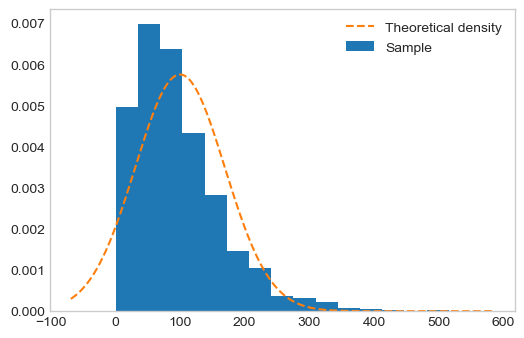

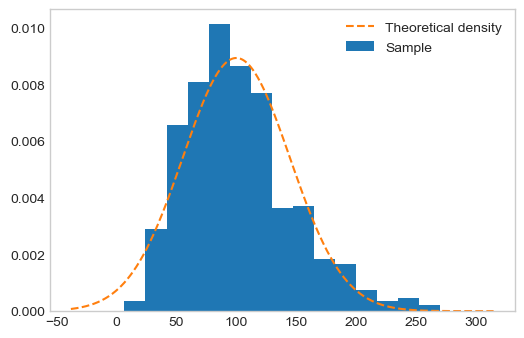

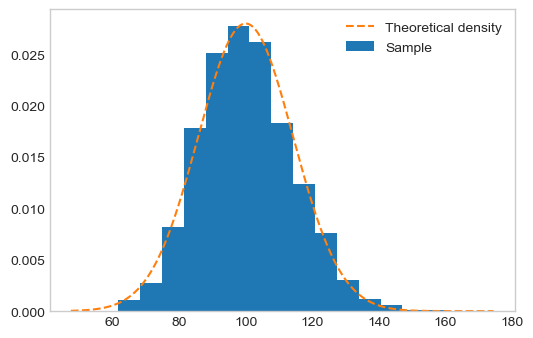

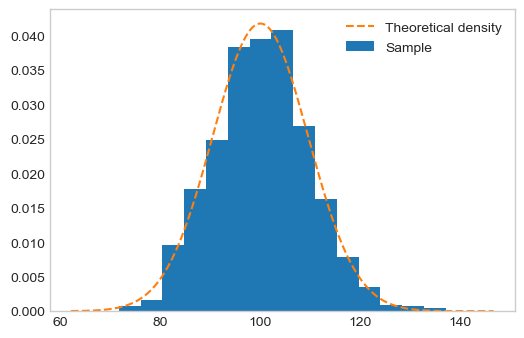

In [416]:
n_list = [2,5,50,100]
loc = 100

for n in n_list:
    means = [np.mean(np.random.exponential(loc,size=n)) for i in range(1000)]
    scale = np.std(means)
    
    ox = np.linspace(min(means)-scale, max(means)+scale, 1000)
    oy = np.array([pdf_normal(loc, scale, x) for x in ox])
    
    plt.hist(means, label='Sample', density=True, bins=15)
    plt.plot(ox, oy, label='Theoretical density', linestyle='dashed')
    plt.legend()
    plt.grid(False)
    plt.show()